In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/afdbd38f1842037f4845237cba184e5d/raw/819a506fcb683f89d8584c3b170f45e04e5056a4/student_dropout_analysis.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
sample_data = data.sample(500, random_state=42)

# Assuming you have the sample data in a pandas DataFrame called 'sample_data'

# Step 1: Calculate sample statistic
sample_statistic = sample_data['Marital status'].mean()  # Example: Mean

# Step 2: Choose a confidence level
confidence_level = 0.95  # For a 95% confidence level

# Step 3: Calculate the standard error (assuming you're estimating the population mean)
sample_size = len(sample_data)
standard_deviation = np.std(data['Marital status'], ddof=1)  # ddof=1 for sample standard deviation
standard_error = standard_deviation / np.sqrt(sample_size)

# Step 4: Compute the margin of error
margin_of_error = ((1 - confidence_level) / 2) * standard_error

# Step 5: Construct the confidence interval
lower_bound = sample_statistic - margin_of_error
upper_bound = sample_statistic + margin_of_error

print("Sample Statistic:", sample_statistic)
print("Confidence Interval:", (lower_bound, upper_bound))
print("Margin of error:", margin_of_error)

Sample Statistic: 1.222
Confidence Interval: (1.2213227543256444, 1.2226772456743555)
Margin of error: 0.000677245674355586


4424


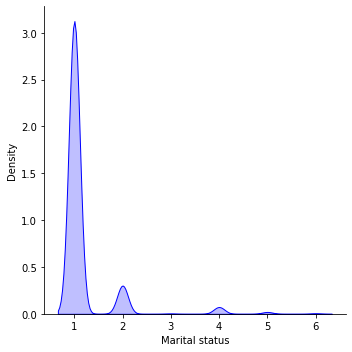

500


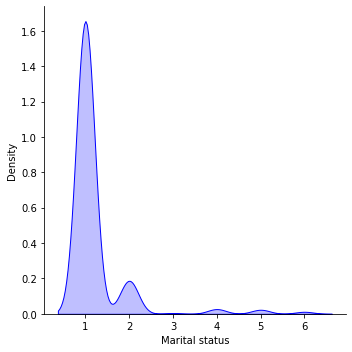

In [4]:
print(len(data))
sns.displot(data['Marital status'], kind='kde', color='blue', fill=True)
plt.show()
print(len(sample_data))
sns.displot(sample_data['Marital status'], kind='kde', color='blue', fill=True)
plt.show()

### Define Null and Alternative Hypothesis

Null Hypothesis (H0): The dropout rate among females who are married is the same as the dropout rate among females who are not married (=)

Alternative Hypothesis (H1): The dropout rate among females who are married is different from the dropout rate among females who are not married (not equal to =/=)

In [5]:
# Choose a Significance Level (alpha)
alpha = 0.05

# Collect Data
# Create a contingency table of observed frequencies
sample_data = sample_data[sample_data['Gender'] == 0]

observed = pd.crosstab(sample_data['Marital status'], sample_data['Target'])
print(observed, "\n\n")

# Perform Chi-squared Test
chi2, p_value, _, expected = chi2_contingency(observed)
print(chi2, p_value)
print(expected)

# Interpret Results
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence of a difference in dropout rates between females who are married and females who are not married.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence of a difference in dropout rates between females who are married and females who are not married.")

Target          Dropout  Enrolled  Graduate
Marital status                             
1                    66        50       177
2                    13         4        10
3                     0         1         0
4                     3         3         0
5                     2         1         1
6                     1         1         0 


26.595793530783407 0.0030163454737277317
[[ 74.78978979  52.79279279 165.41741742]
 [  6.89189189   4.86486486  15.24324324]
 [  0.25525526   0.18018018   0.56456456]
 [  1.53153153   1.08108108   3.38738739]
 [  1.02102102   0.72072072   2.25825826]
 [  0.51051051   0.36036036   1.12912913]]
Reject Null Hypothesis: There is evidence of a difference in dropout rates between females who are married and females who are not married.


NULL HYPOTHESIS 1: There is no significant correlation between marital status and dropout rates for female students.

ALTERNATE HYPOTHESIS 1: There is a significant correlation between marital status and dropout rates for female students.

In [6]:
# Calculate Spearman's rank correlation
encoder = LabelEncoder()
correlation, p_value = pearsonr(sample_data['Marital status'], encoder.fit_transform(sample_data["Target"]))

print("Spearman's Rank Correlation Coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence of a significant correlation between marital status and dropout rates for female students.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence of a significant correlation between marital status and dropout rates for female students.")


Spearman's Rank Correlation Coefficient: -0.20745571287272813
p-value: 0.00013726776288993525
Reject Null Hypothesis: There is evidence of a significant correlation between marital status and dropout rates for female students.
